In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
from sklearn.model_selection import GridSearchCV


In [119]:
from sklearn.model_selection import( train_test_split )
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
    f1_score,
    roc_auc_score,
)

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, RandomizedSearchCV


In [8]:
from nltk.tokenize import word_tokenize
from cleantext import clean

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression

In [10]:
from wordcloud import WordCloud, STOPWORDS


In [27]:
data=pd.read_csv(r'C:\Users\Zigron\Downloads\spam ham dataset\spam.csv')

In [28]:
data=data[['v1','v2']]

In [29]:
data.columns=['label','message']
data=data[['message','label']]

In [30]:
data.head(2)

,message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham


In [31]:
data.isnull().sum()


message    0
label      0
dtype: int64

### In this dataset we have more legitimate messages (ham) than spam messages.



In [32]:
data["label"].value_counts()


ham     4825
spam     747
Name: label, dtype: int64

### Exploratory Data Analysis
### This is very important steps in creating your machine learning project. It helps you understand more about your dataset.

### In this step we are going to find frequent words that are used in both legitimate and spam messages.

In [35]:
def collect_words(data, label):
    collected_words = " "

    # iterate through the csv file
    for val in data.message[data["label"] == label]:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        for words in tokens:
            collected_words = collected_words + words + " "

    return collected_words


# The above function called collect_words() will collect all words from the dataset according to their labels (ham or spam).

### Then we can visualize frequent words by using the wordcloud Python package. We will start with messages labeled as ham (legitimate).

Total words 346907


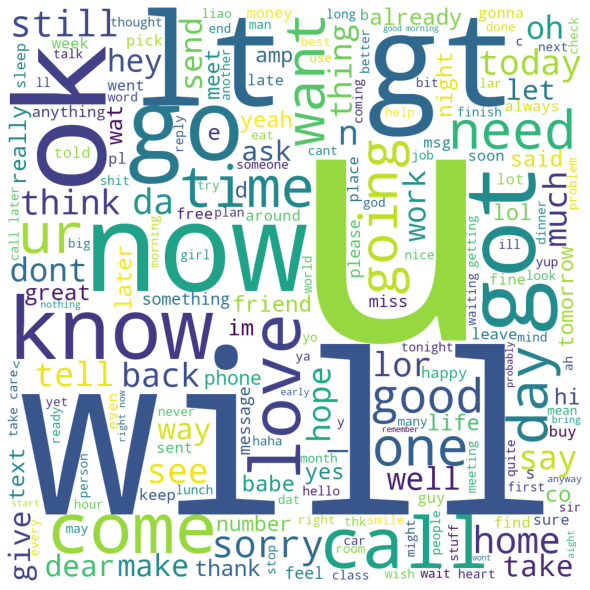

In [37]:
cloud_stopwords = set(STOPWORDS)
ham_words = collect_words(data, label="ham")

print("Total words {}".format(len(ham_words)))

wordcloud = WordCloud(
    width=1000,
    height=1000,
    background_color="white",
    stopwords=cloud_stopwords,
    min_font_size=10,
).generate(ham_words)

# plot the WordCloud image
plt.figure(figsize=(15, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Total words 104124


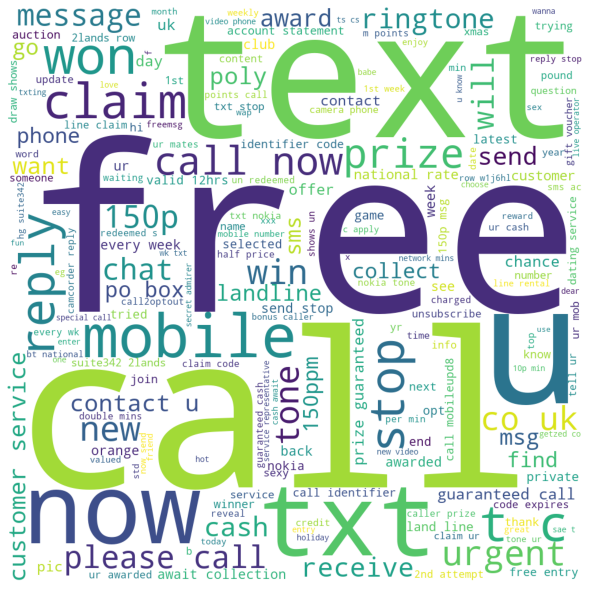

In [38]:
cloud_stopwords = set(STOPWORDS)
ham_words = collect_words(data, label="spam")

print("Total words {}".format(len(ham_words)))

wordcloud = WordCloud(
    width=1000,
    height=1000,
    background_color="white",
    stopwords=cloud_stopwords,
    min_font_size=10,
).generate(ham_words)

# plot the WordCloud image
plt.figure(figsize=(15, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

###  The most important  repeated words are call, free text, mobile , please call  the words that are repeated most show in large 

### How to Process the Data
After exploring and analyzing the dataset, the next step is to preprocess the dataset into the right format before creating our machine learning model.

We first replace the ham and spam classes with numerical values. The ham class will be labeled as 0 and spam class will be labeled as 1.

In [39]:
# replace ham to 0 and spam to 1
new_data = data.replace({"ham": 0, "spam": 1})
new_data.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [40]:
stop_words =  stopwords.words('english')

def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"ur", " your ", text)
    text = re.sub(r" nd "," and ",text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r" tkts "," tickets ",text)
    text = re.sub(r" c "," can ",text)
    text = re.sub(r" e g ", " eg ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
    text = re.sub(r" u "," you ",text)
    text = text.lower()  # set in lowercase 
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)

### Now we can clean our dataset by using the text_cleaning() function.



In [41]:
new_data["clean_message"] = new_data["message"].apply(text_cleaning)

In [43]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    new_data["clean_message"],
    new_data["label"],
    test_size=0.15,
    random_state=0,
    shuffle=True,
    stratify=data["label"],
)

In [44]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(X_train)

#transform train data 
X_train_trans = vectorizer.transform(X_train)

#transform test data
X_text_trans = vectorizer.transform(X_test)

In [46]:
X_train_trans.shape

(4736, 6800)

In [47]:
X_text_trans.shape

(836, 6800)

In [49]:
spam_classifier = MultinomialNB()


In [50]:
scores = cross_val_score(spam_classifier,X_train_trans,y_train,cv=10,verbose=3,n_jobs=-1) # 10 models created on each fold


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.7s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.8s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished


In [51]:
scores

array([0.97257384, 0.97257384, 0.97468354, 0.98945148, 0.97257384,
       0.98101266, 0.9640592 , 0.98731501, 0.97885835, 0.97463002])

In [127]:
parameters = {"alpha": [1, 0.1, 0.01, 0.001, 0.0001, 0, 0.2, 0.3]}

spam_classifier = GridSearchCV(
    spam_classifier,
    parameters,
    n_jobs=-1,
    cv=10,
    return_train_score=True,
    verbose=2,
)

In [5]:
df=pd.DataFrame(spam_classifier.cv_results_)

In [91]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [63]:
spam_classifier.fit(X_train_trans, y_train)


C:\Users\Zigron\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 8 candidates, totalling 80 fits


RandomizedSearchCV(cv=10, estimator=MultinomialNB(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [1, 0.1, 0.01, 0.001, 0.0001,
                                                  0, 0.2, 0.3]},
                   random_state=42, return_train_score=True, verbose=2)

In [113]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.9769841482234771
MultinomialNB(alpha=0.01)
{'alpha': 0.01}


In [64]:
y_pred =spam_classifier.predict(X_text_trans)


### accuracy is used when we have balanced classes 

In [65]:
accuracy_score(y_test, y_pred)

0.9760765550239234

### F1 SCORE IS USED WHEN WE HAVE IMBALANCED CLASSES

### SO OUR MODEL IS GOOD TO HANDLE INBALANCE CLASS 1

In [67]:
f1_score(y_test, y_pred)

0.908256880733945

### saving our model using joblib

In [69]:
import joblib 

joblib.dump(spam_classifier, 'spam-detection-model.pkl')

['spam-detection-model.pkl']

In [86]:
joblib.dump(vectorizer,'count_vectorizer.pkl')


['count_vectorizer.pkl']

### deploy model on algorithmia

In [93]:
import Algorithmia


In [101]:
apiKey = "xxxxxxxxxxxxxxxxxxxxxxxxxxxx"
client = Algorithmia.client(apiKey)

In [4]:
algo = client.algo('rafay1234/SMS_SPAM_DETECTION')

# Pass in input required by algorithm
input_sms = "Win a Â£1000 cash prize or a prize worth Â£5000"

try:
    # Get the result
    print(algo.pipe(input_sms).result)
except Exception as error:
    # Algorithm error if, for example, the input is not correctly formatted
    print(error)

<Response [404]>


In [1]:
import Algorithmia

input = 'Win a Â£1000 cash prize or a prize worth Â£5000'
client = Algorithmia.client('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
algo = client.algo('rafay1234/SMS_SPAM_DETECTION/') # rafay1234/SMS_SPAM_DETECTION/1b65a202308c64c7d19da6811c4eb2adb1db556f
print(algo.pipe(input).result)